<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog - V1 - Simple
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

|       |                       |
|-------|-----------------------|
| Jalon | Date limite 07/08/2022|
| Critères de performance | À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.|
|Livrables|Une présentation type "Powerpoint", faisant office de veille et Jupyter Notebooks : classification|

### Livrables

Une présentation type "Powerpoint", faisant office de veille.

Quelques questions de veille 
- C'est quoi le Deep Learning 
- Présenter la librairie Tensorflow ...
- Qu'est-ce qu'un CNN (l'avantage, l'inconvénient, domaine d'application), est-ce qu'il y a d'algorithmes plus puissants que CNN 
- Décrire notamment comment construire un CNN et l'utilité de chaque étape 
(sinon vous pouvez représenter d'autres axes qui vous sembler intéressant à savoir avant de commencer un projet sur le Deep Learning)


Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/
- https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from os import getcwd
from os.path import exists, join

import cv2

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 1

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
training_data_path = join(source_data_path, "training_set")
validation_data_path = join(source_data_path, "validation_set")
model_path = join(file_path, "model")
print("Source path :", source_data_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)
print("model path :", model_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\validation_set
model path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\model


In [4]:
model_save_names =  [f"cnn{i}.pkl" for i in range(1, 5)]
model_force_train = {}
for model_name in model_force_train:
    file_path = join(model_path, model_name)
    model_force_train[model_name] = not exists(file_path)
print(model_save_names)
model_force_train

['cnn1.pkl', 'cnn2.pkl', 'cnn3.pkl', 'cnn4.pkl']


{}

<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Nettoyage
</div>

```
Deleted 1573 images.
Deleted 639 images.
```
Images supprimées du dataset au premier tour (aux prochaines exécutions, les chiffres devraient être à 0, donc pour mémoire)

In [5]:
# Il faut supprimer les images qui ne sont pas compatibles
removed_files = del_corrupt_img(training_data_path, include_sub_dir=1, verbose=verbose)
removed_files.extend(del_corrupt_img(validation_data_path, include_sub_dir=1, verbose=verbose))

Deleted 0 images.
Deleted 0 images.


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Exploration
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.2.1. Visualisation
</div>

In [6]:
imgs_train = get_dir_files(training_data_path, include_sub_dir=1, verbose=verbose)
imgs_train = sorted(imgs_train)
print(f"{len(imgs_train)} images d'entrainement.")

23411 images d'entrainement.


(-0.5, 109.5, 150.5, -0.5)

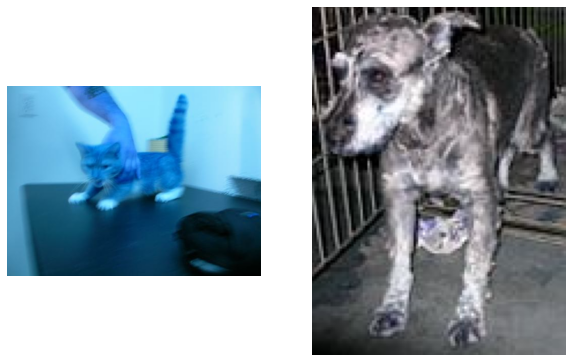

In [7]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 1)
imread = cv2.imread(join(training_data_path, imgs_train[0]))
plt.imshow(imread)
plt.axis("off")

plt.subplot(2, 2, 2)
imread = cv2.imread(join(training_data_path, imgs_train[-1]))
plt.imshow(imread)
plt.axis("off")

In [8]:
imgs_test = get_dir_files(validation_data_path, include_sub_dir=1, verbose=verbose)
imgs_test = sorted(imgs_test)
print(f"{len(imgs_test)} images de validation.")

163 images de validation.


In [9]:
total_données = (len(imgs_test)+len(imgs_train))
print(f"Taux de train : {round(len(imgs_train)/total_données*100)}")
print(f"Taux de validation : {round(len(imgs_test)/total_données*100)}")

Taux de train : 99
Taux de validation : 1


<div style="display: flex; background-color: indigo;" >

#### 2.2.2. Création d'une DF pour exploration
</div>

In [11]:
df_train = get_df_image(imgs_train, training_data_path, verbose=verbose)
df_train.head()

,file_name,file_type,category_name,img_height,img_width,img_dim
0,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,500,375,3
1,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,320,426,3
2,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,226,175,3
3,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,150,150,3
4,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,500,375,3


In [12]:
image_Width_max=df_train['img_width'].max()
image_Height_max=df_train['img_height'].max()
image_Width_min=df_train['img_width'].min()
image_Height_min=df_train['img_height'].min()
print(f"Dimension Max : {image_Width_max} x {image_Height_max}")
print(f"Dimension Min : {image_Width_min} x {image_Height_min}")

Dimension Max : 500 x 500
Dimension Min : 33 x 50


Comme les données ont été augmentées, il a fallu revoir les données de validation, puisque les ancienne était déjà dans le train.
Il faut donc vérifier que les données de validation sont cohérentes avec les données de train.

In [14]:
df_test = get_df_image(imgs_test, validation_data_path, verbose=verbose)
df_test.head()

,file_name,file_type,category_name,img_height,img_width,img_dim
0,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpeg,cat,960,718,3
1,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,2861,3815,3
2,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,2690,3460,3
3,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpeg,cat,960,718,3
4,c:\Users\User\WORK\workspace-ia\PROJETS\projet...,jpg,cat,3000,4000,3


In [15]:
image_test_Width_max=df_test['img_width'].max()
image_test_Height_max=df_test['img_height'].max()
image_test_Width_min=df_test['img_width'].min()
image_test_Height_min=df_test['img_height'].min()
print(f"Dimension Max : {image_test_Width_max} x {image_test_Height_max}")
print(f"Dimension Min : {image_test_Width_min} x {image_test_Height_min}")

Dimension Max : 4000 x 4160
Dimension Min : 454 x 322


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Chargement des données
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.1.2. Chargement et standardisation des données
</div>

Dans le dataset, les dimensions sont :

`
Train => Dimension Max : 500 x 500 / Dimension Min : 33 x 50
`

`
Validation => Dimension Max : 4000 x 4160 / Dimension Min : 454 x 322
`

La taille la plus petite, est trop petite (après avoir essayé avec les valeurs `(64,64)` et `(50,50)`, il faut donc identifier une taille "raisonnable".

In [16]:
# target_size=(64,64) # la taille de la plus petite image
# target_size=(50,50) # la taille de la plus petite image
target_size=(180,180)
batch_size = 32
class_mode='binary'
rescale=1./255 # standardisation des données des images

In [17]:
train_datgen=ImageDataGenerator(rescale=rescale, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
training_set=train_datgen.flow_from_directory(training_data_path,     target_size=target_size,batch_size=batch_size,class_mode=class_mode)
validation_set=train_datgen.flow_from_directory(validation_data_path, target_size=target_size,batch_size=batch_size,class_mode=class_mode)

Found 23411 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    training_data_path,
    seed=1337,
    image_size=target_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_path,
    seed=1337,
    image_size=target_size,
    batch_size=batch_size,
)

Found 23411 files belonging to 2 classes.
Found 163 files belonging to 2 classes.


<div style="display: flex; background-color: indigo;" >

#### 2.1.3. Identification des labels
</div>

In [27]:
label_codes=training_set.class_indices
print(label_codes)
labels = list(label_codes.keys())
labels

{'cat': 0, 'dog': 1}


['cat', 'dog']

In [24]:
imgs_train_y = []

for f in imgs_train:
    category=f.split('\\')[-1]
    category=category.split('.')[0]
    imgs_train_y.append(label_codes.get(category,0))

imgs_test_y = []

for f in imgs_test:
    category=f.split('\\')[-1]
    category=category.split('.')[0]
    imgs_test_y.append(label_codes.get(category,0))

<div style="display: flex; background-color: indigo;" >

#### 2.1.4. Visualisation
</div>

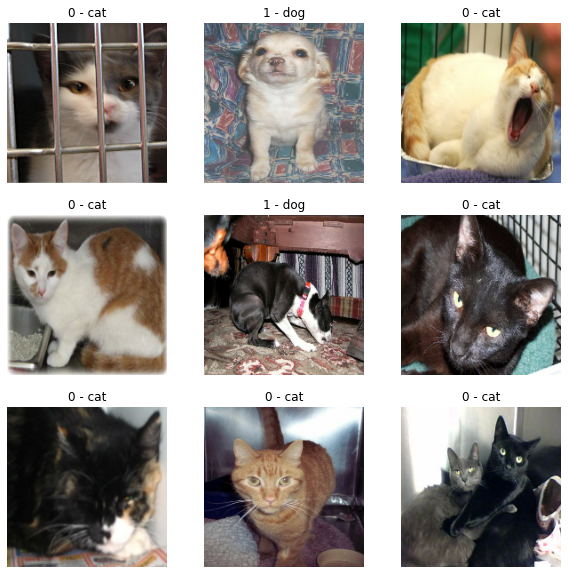

In [28]:
plt.figure(figsize=(10, 10))
for images, ds_labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        id = int((ds_labels[i]))
        plt.title(f"{id} - {labels[id]}")
        plt.axis("off")

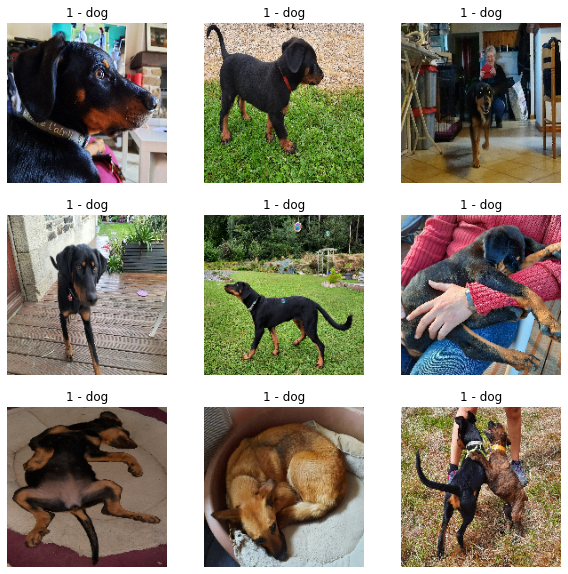

In [29]:
plt.figure(figsize=(10, 10))
for images, ds_labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        id = int((ds_labels[i]))
        plt.title(f"{id} - {labels[id]}")
        plt.axis("off")

<div style="display: flex; background-color: indigo;" >

#### 2.1.4. Images de tests
</div>

In [30]:
img_tests, img_tests_y = get_validation_img(label_codes=label_codes, verbose=0)
img_test_cat = img_tests[0]
img_test_dog = img_tests[-1]

(-0.5, 3999.5, 2999.5, -0.5)

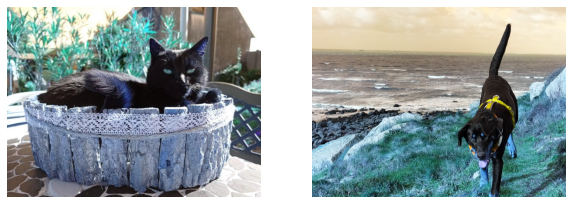

In [31]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 1)
imread = cv2.imread(img_test_cat)
plt.imshow(imread)
plt.axis("off")

plt.subplot(2, 2, 2)
imread = cv2.imread(img_test_dog)
plt.imshow(imread)
plt.axis("off")

<div style="display: flex; background-color: blue;" >

# 3.Modèle simple - CNN1
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.1. Création du réseau de neurones
</div>

Résultats pour ce modèle : 

| Epoch | Train cat          | Train dog         | Res |
|-------|--------------------|-------------------|-----|
| 50/50 | 1 029              | 1 119             |`68/68 [==============================] - 11s 168ms/step - loss: 0.6710 - accuracy: 0.5945 - val_loss: 0.6762 - val_accuracy: 0.5780`|
| 50/50 | 1 029 + 12 500     | 1 119 + 12 500    |`800/800 [==============================] - 70s 88ms/step - loss: 0.6185 - accuracy: 0.6745 - val_loss: 0.6189 - val_accuracy: 0.6740`|

Ajout de 12 500 images par catégorie (source : PetImages), après suppression des images corrompues :

```
Training : Found 25570 images belonging to 2 classes.
Validation : Found 2000 images belonging to 2 classes.
```

Les essais de ce modèle n'ont pas été concluant, malgré l'augmentation des données d'apprentissage et une courbe d'appprentissage prometteuse :

![Courbe d'apprentissage](presentation/img/cnn1_modele_simple_courbe_apprentissage.png)

Les différentes prédictions effectuées étaient en erreur sur les chats.

![Matrice confusion](presentation/img/cnn1_modele_simple_matrice_confusion.png)

Ce modèle n'est donc pas adapté ou il faut travailler sur l'optimisation des paramètres.

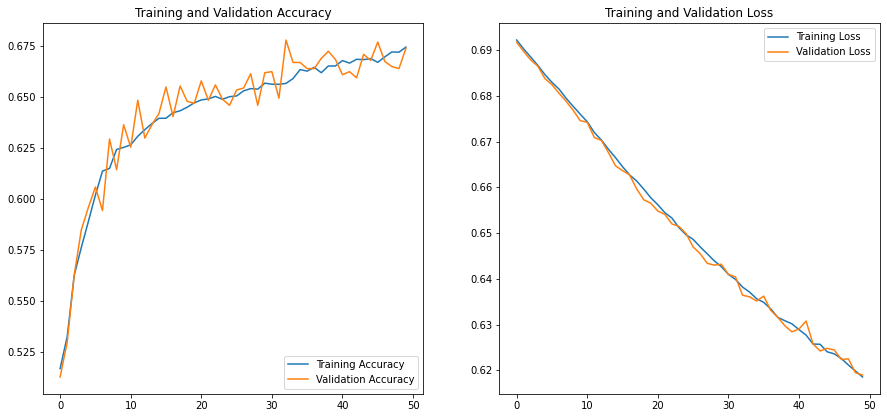

In [16]:
# Pour exécuter le code, passer le paramètre fit_ccn1 à True.as_integer_ratio.
# Par défaut il est à False pour ne pas l'exécuter à chaque fois.
fit_ccn1 = False
model_cnn1_name = "cnn1.pkl"
cnn = None

if fit_ccn1:
    if model_force_train.get(model_cnn1_name, True):
        cnn = create_and_fit_cnn1(target_size=target_size, training_set=training_set,validation_set=validation_set, epochs=50, model_path=join(model_path, model_cnn1_name),verbose=verbose)
    else:
        cnn = keras.models.load_model(join(model_path, model_cnn1_name))

    if verbose and cnn is not None:
        print(cnn.summary())
        tf.keras.utils.plot_model(cnn, show_shapes=True)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. Prédiction
</div>

In [18]:
if cnn is not None:
    found, predict_class = predict_img(model=cnn,img_test=img_test_cat, target_size=target_size, labels=labels,label_expected="cat",verbose=verbose)
    print(f"Expected : cat, predict : {labels[predict_class]}")
    found, predict_class = predict_img(model=cnn,img_test=img_test_dog, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)
    print(f"Expected : dog, predict : {labels[predict_class]}")

1/1 [==============================] - 3s 3s/step


(1, 1)

1/1 [==============================] - 0s 18ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 22ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 20ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 18ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 17ms/step
cat expected (predict_class : 1), dog predict


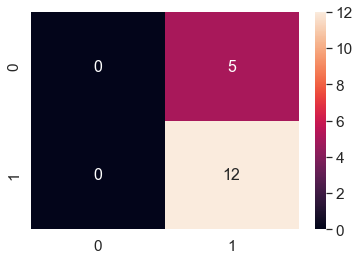

In [19]:
if cnn is not None:
    df_cm, fail_files = predict_n_img(cnn, img_tests, img_tests_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: blue;" >

# 4.Modèle pré-entrainés
</div>

https://keras.io/api/applications/#usage-examples-for-image-classification-models

Résultats des tests : (cf. notebook excluded model)

|Model   | Commentaires                                                                                                       |
|--------|--------------------------------------------------------------------------------------------------------------------|
|ResNet50| Toutes les images testées ont été classifiées en : `Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]`, même les images de chat|
| VGG16  | Permet d'extraire des features|
| VGG19  | Permet d'extraire des features|
| InceptionV3 | Résultat avec 50 Epoch : `800/800 [==============================] - 60s 75ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000`|


<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. ResNet50
</div> 

Toutes les images testées ont été classifiées en : 

`Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]`

même les images de chat. Ce modèle n'est donc pas adapté tel quel.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.3. VGG*
</div>

VGG16 et VGG19 permettent d'extraire des features, qui doivent certainement être utilisées par ailleurs. ?

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.4. InceptionV3
</div>

1. Récupération du modèle
1. Customisation du modèle
1. Compilation et apprentissage sur les données du projet
1. Résultat avec 50 Epoch : `800/800 [==============================] - 60s 75ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000`

Ce modèle ne semble pas adapté à notre besoin, de plus il est beaucoup trop complexe.

<div style="display: flex; background-color: blue;" >

# 5.Nouveau modèle : CNN2
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.1.Création du modèle
</div> 

Représentation du modèle :

![Représentation du modèle](presentation/img/cnn2_model_graph_du_modele.png)


`Epoch 25/50`

`800/800 [==============================] - 264s 330ms/step - loss: 0.5798 - accuracy: 0.6946 - val_loss: 0.5567 - val_accuracy: 0.7170`

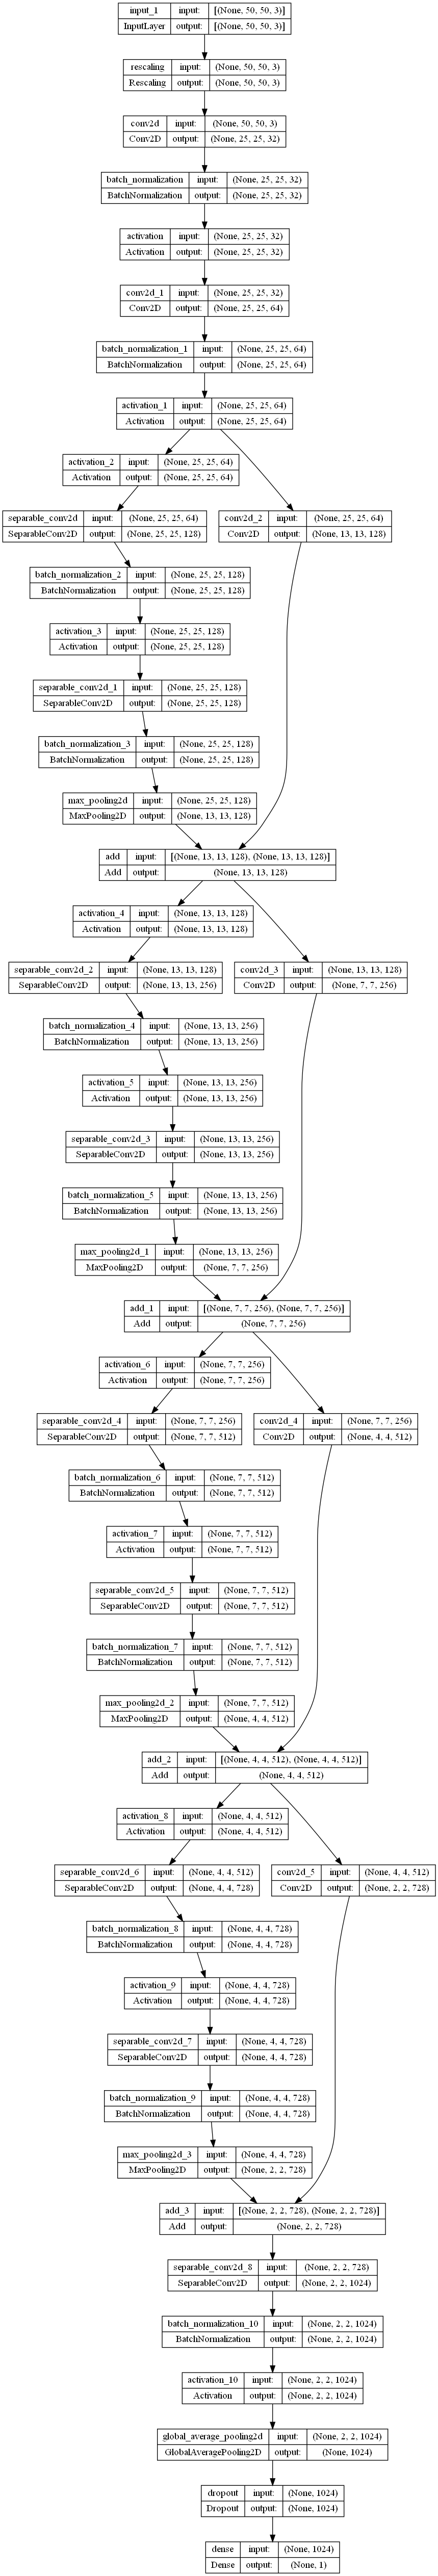

In [8]:
fit_cnn2 = True
model_cnn2_name = "cnn2.pkl"
model_cnn_2 = None
epochs = 50
if fit_cnn2:
    if model_force_train.get(model_cnn2_name, True):
        # Création du modèle
        model_cnn_2 = make_model(input_shape=target_size + (3,), num_classes=2, data_augmentation=False)
        opt = Adam(learning_rate=0.000001)
        # Compilation du modèle
        model_cnn_2.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    
        # @see : https://keras.io/api/callbacks/model_checkpoint/
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                filepath="model_check_point/cnn_v2_best.h5",
                save_best_only=False,
                verbose=verbose,
                )
        ]
        # Entrainement du modèle
        history_cnn2 = model_cnn_2.fit(training_set, epochs = epochs , validation_data=validation_set, callbacks=callbacks)
        # Evaluation du modèle
        show_learning_graph(history=history_cnn2, epochs=epochs, verbose=verbose)
    else:
        model_cnn_2 = keras.models.load_model(join(model_path, model_cnn2_name))

    if verbose and model_cnn_2 is not None:
        print(model_cnn_2.summary())
        tf.keras.utils.plot_model(model_cnn_2, show_shapes=True)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. Prédiction
</div>

In [ ]:
if model_cnn_2 is not None:
    found, predict_class = predict_img(model=model_cnn_2,img_test=img_test_cat, target_size=target_size, labels=labels,label_expected="cat",verbose=verbose)
    print(f"Expected : cat, predict : {labels[predict_class]}")
    found, predict_class = predict_img(model=model_cnn_2,img_test=img_test_dog, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)
    print(f"Expected : dog, predict : {labels[predict_class]}")

1/1 [==============================] - 3s 3s/step


(1, 1)

In [ ]:
if model_cnn_2 is not None:
    df_cm, fail_files = predict_n_img(model_cnn_2, img_tests, img_tests_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.3. Conclusion
</div>

...

<div style="display: flex; background-color: blue;" >

# 5. Essai d'optimisation
</div>

Traitements possibles pour améliorer les prédictions :
- Augmenter les données de train :
  - Niveau 1 => ajouter des données => FAIT
  - Niveau 2 => augmenter les données existantes (faire pivoter les images)
  - Essayer en noir et blanc ?

- Traiter les images :
  - Augmenter la taille des images (rezise)
  - Enlever les flous
  - Equalizer les images
  
- Utiliser les CIF :
  - Identifier les descripteurs
  - traiter les descripteurs et non les pixels, 

- Modèles :
  - Améliorer les paramètres
  - Augmenter les couches

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.1. essai 1 : taille des images
</div>

In [ ]:
target_size_optimised=(180,180) # la taille de la plus petite image
batch_size_optimised = 32
class_mode='binary'
rescale=1./255 # standardisation des données des images

In [ ]:
train_datgen=ImageDataGenerator(rescale=rescale, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
training_set_up=train_datgen.flow_from_directory(training_data_path,     target_size=target_size_optimised,batch_size=batch_size_optimised,class_mode=class_mode)
validation_set_up=train_datgen.flow_from_directory(validation_data_path, target_size=target_size_optimised,batch_size=batch_size_optimised,class_mode=class_mode)

In [ ]:
model_cnn_3 = make_model(input_shape=target_size + (3,), num_classes=2, data_augmentation=False)
keras.utils.plot_model(model_cnn_3, show_shapes=True)

In [ ]:
opt = Adam(learning_rate=0.000001)
model_cnn_3.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("model_check_point/cnn_v3/save_at_{epoch}.h5"),
]

In [ ]:
epochs = 50
history_cnn3 = model_cnn_3.fit(training_set_up, epochs = epochs , validation_data=validation_set_up, callbacks=callbacks)

In [ ]:
show_learning_graph(history=history_cnn3, epochs=epochs, verbose=verbose)

In [ ]:
found, predict_class = predict_img(model=model_cnn_3,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

if found :
    print(f"Expected : dog, found : {labels[predict_class]}"
else:
    print(f"Expected : dog, not found : {labels[predict_class]}"

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()
df_cm, fail_files = predict_n_img(model_cnn_3, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.2. essai 1 - data augmentation
</div>

A priori lorsqu'on dispose de peu de données il est recommandé d'appliquer ce traitement pour avoir différents points de vue d'une même image et donc avoir plus de données.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
model_cnn_4 = make_model(input_shape=target_size + (3,), num_classes=2, data_augmentation=data_augmentation)
keras.utils.plot_model(model_cnn_3, show_shapes=True)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("model_check_point/cnn_v4/save_at_{epoch}.h5"),
]

In [ ]:
epochs = 50
history_cnn4 = model_cnn_4.fit(training_set_up, epochs = epochs , validation_data=validation_set_up, callbacks=callbacks)

In [ ]:
show_learning_graph(history=history_cnn4, epochs=epochs, verbose=verbose)

In [ ]:
found, predict_class = predict_img(model=model_cnn_4,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)

if found :
    print(f"Expected : dog, found : {labels[predict_class]}"
else:
    print(f"Expected : dog, not found : {labels[predict_class]}"

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()
df_cm, fail_files = predict_n_img(model_cnn_4, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.3. Traiter les images avec les histogrammes
</div>

Enlever les fllous, uniformiser, ...

<div style="display: flex; background-color: Green; padding: 7px;" >

### 5.4. CIF
</div>

Identifier les descripteurs, les points clés pour simplifier, les traitements et au besoin ajouter des couches.